In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import beta, binom
import itertools
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm
import hashlib
%matplotlib inline
sns.set(style="dark")
plt.style.use("ggplot")
import pymc as pm
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.INFO)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
games_csv = pd.read_csv('/content/drive/MyDrive/Fall 2023/Data C102 Project/Google Colab/games.csv')
games_details_csv = pd.read_csv('/content/drive/MyDrive/Fall 2023/Data C102 Project/Google Colab/games_details.csv')
rankings_csv = pd.read_csv('/content/drive/MyDrive/Fall 2023/Data C102 Project/Google Colab/ranking.csv')
teams_csv = pd.read_csv('/content/drive/MyDrive/Fall 2023/Data C102 Project/Google Colab/teams.csv')

<ipython-input-3-9aeecdddc2be>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_csv = pd.read_csv('/content/drive/MyDrive/Fall 2023/Data C102 Project/Google Colab/games_details.csv')


In [4]:
games_csv.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [5]:
games_details_csv.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [6]:
rankings_csv.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [7]:
teams_csv.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


# **Original Pre-Processing and Analysis**

In [8]:
merged = games_csv.merge(games_details_csv, left_on='GAME_ID', right_on='GAME_ID')

In [9]:
merged['GAME_DATE_EST'] = pd.to_datetime(merged['GAME_DATE_EST'])
start_covid = pd.Timestamp('2020-08-17')
end_covid = pd.Timestamp('2020-10-11')

start_post_covid = pd.Timestamp('2021-05-22')
end_post_covid = pd.Timestamp('2021-07-22')
covid_df = merged[(merged['GAME_DATE_EST'] >= start_covid) & (merged['GAME_DATE_EST'] <= end_covid)]
post_covid_df = merged[(merged['GAME_DATE_EST'] >= start_post_covid) & (merged['GAME_DATE_EST'] <= end_post_covid)]

In [10]:
teams_covid = covid_df['TEAM_ID'].unique()
teams_post_covid = post_covid_df[post_covid_df['TEAM_ID'].isin(teams_covid)]['TEAM_ID'].unique()
new_post_covid_df = post_covid_df[post_covid_df['TEAM_ID'].isin(teams_post_covid)]
new_covid_df = covid_df[covid_df['TEAM_ID'].isin(teams_post_covid)]

print(len(covid_df['GAME_ID'].unique()))
print(len(new_post_covid_df['GAME_ID'].unique()))

83
80


In [11]:
def split_teams(df, id):
  return df[df['HOME_TEAM_ID'] == id]

Text(0.5, 1.0, 'Number of Personal Fouls Across Teams during COVID')

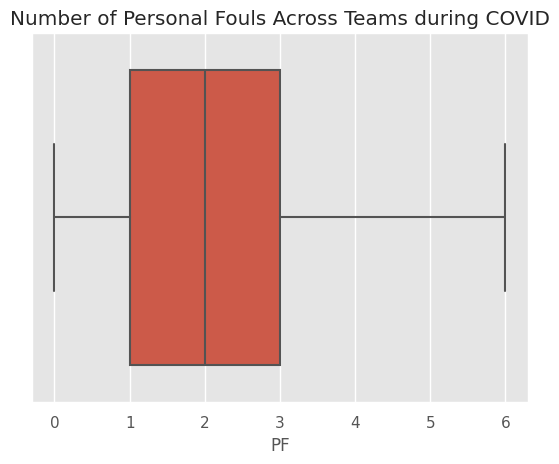

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=new_covid_df['PF'])
plt.title('Number of Personal Fouls Across Teams during COVID')

In [13]:
new_covid_df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION',
       'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

Text(0.5, 1.0, 'Number of Personal Fouls Across Teams post COVID')

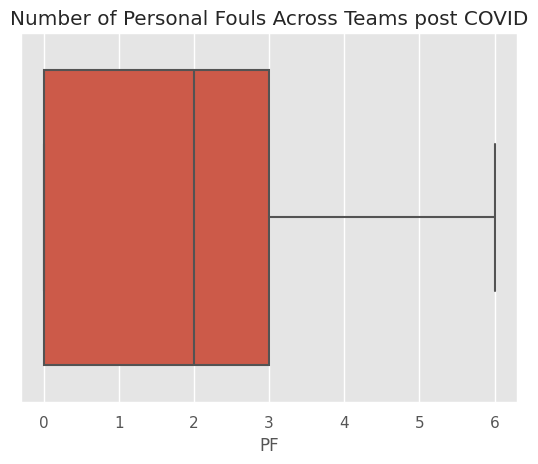

In [14]:
sns.boxplot(x=new_post_covid_df['PF'])
plt.title('Number of Personal Fouls Across Teams post COVID')

In [15]:
covid_df_team = new_covid_df.groupby('TEAM_ID').sum()
post_covid_df_team = new_post_covid_df.groupby('TEAM_ID').sum()

<ipython-input-15-1cac67e1233a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_df_team = new_covid_df.groupby('TEAM_ID').sum()
<ipython-input-15-1cac67e1233a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  post_covid_df_team = new_post_covid_df.groupby('TEAM_ID').sum()


Text(0.5, 0, 'Number of Total Rebounds per team')

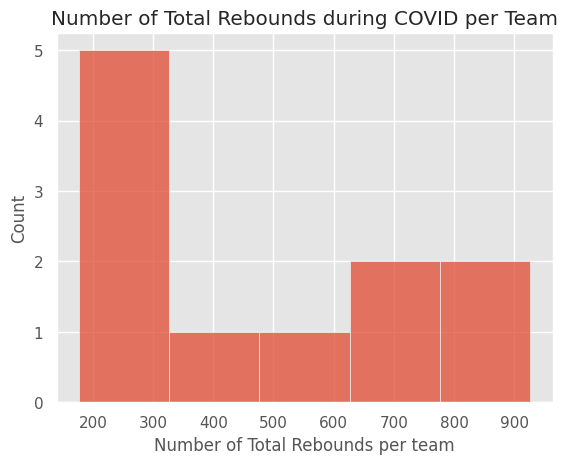

In [16]:
sns.histplot(data = covid_df_team, x='REB')
plt.title('Number of Total Rebounds during COVID per Team')
plt.xlabel('Number of Total Rebounds per team')

Text(0.5, 0, 'Number of Total Rebounds per team')

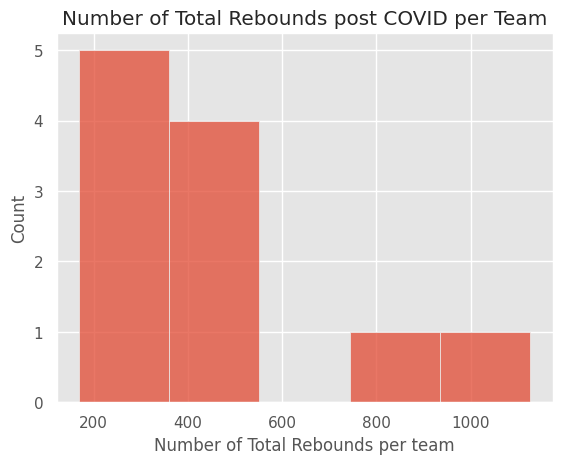

In [17]:
sns.histplot(data = post_covid_df_team, x='REB')
plt.title('Number of Total Rebounds post COVID per Team')
plt.xlabel('Number of Total Rebounds per team')

In [18]:
len(new_covid_df['GAME_ID'].unique())

76

In [19]:
len(new_post_covid_df['GAME_ID'].unique())

80

In [20]:
len(new_covid_df['TEAM_ID'].unique())

11

In [21]:
len(new_post_covid_df['TEAM_ID'].unique())

11

Text(0.5, 0, 'Number of Total Steals per team')

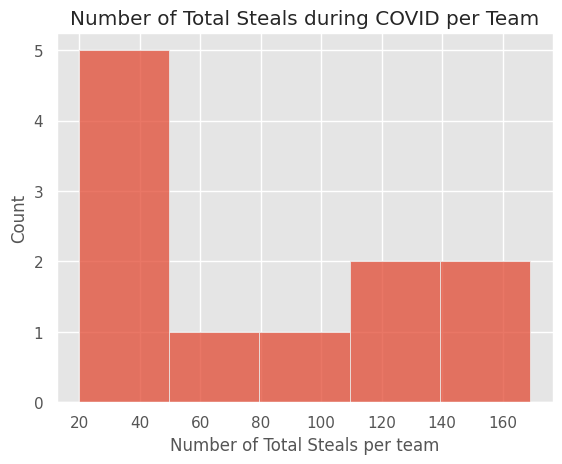

In [22]:
sns.histplot(data = covid_df_team, x='STL')
plt.title('Number of Total Steals during COVID per Team')
plt.xlabel('Number of Total Steals per team')

Text(0.5, 0, 'Number of Total Steals per team')

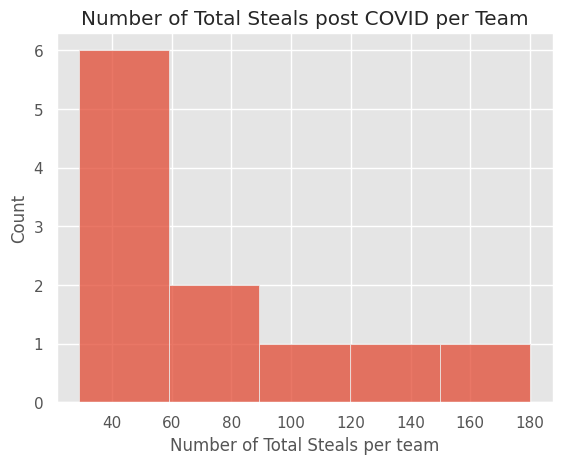

In [23]:
sns.histplot(data = post_covid_df_team, x='STL')
plt.title('Number of Total Steals post COVID per Team')
plt.xlabel('Number of Total Steals per team')

In [24]:
rankings_csv

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


Text(0.5, 1.0, 'Win Rates for Each Conference Region')

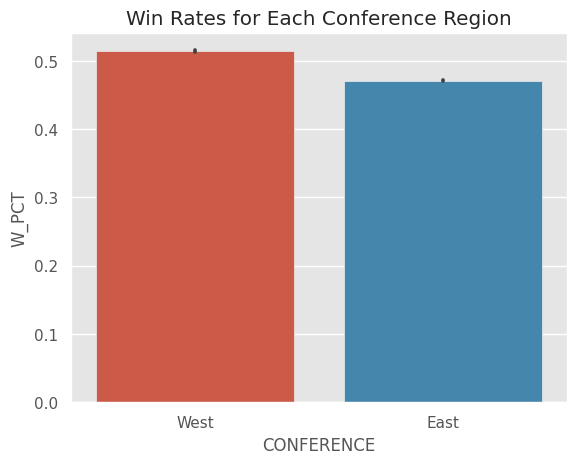

In [25]:
sns.barplot(rankings_csv, x='CONFERENCE', y='W_PCT')
plt.title('Win Rates for Each Conference Region')

In [26]:
rankings_csv[rankings_csv['CONFERENCE'] == "West"][['W_PCT']].describe()

,W_PCT
count,104984.000000
mean,0.514617
std,0.188218
min,0.000000
25%,0.400000
50%,0.529000
75%,0.646000
max,1.000000


In [27]:
rankings_csv[rankings_csv['CONFERENCE'] == "East"][['W_PCT']].describe()

,W_PCT
count,105358.000000
mean,0.471125
std,0.184772
min,0.000000
25%,0.354000
50%,0.483000
75%,0.588000
max,1.000000


In [28]:


teams_csv

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [29]:
teams_csv.loc[teams_csv["NICKNAME"] == "Pelicans", "ARENACAPACITY"] = 17791
teams_csv.loc[teams_csv["NICKNAME"] == "Suns", "ARENACAPACITY"] = 18422
teams_csv.loc[teams_csv["NICKNAME"] == "Magic", "ARENACAPACITY"] = 18500
teams_csv.loc[teams_csv["NICKNAME"] == "Nets", "ARENACAPACITY"] = 19000
teams_csv.loc[teams_csv["NICKNAME"] == "76ers", "ARENACAPACITY"] = 20318

In [30]:
teams_csv['ARENACAPACITY'].value_counts()

19060.0    2
17500.0    2
18729.0    1
20318.0    1
20562.0    1
19026.0    1
21000.0    1
20647.0    1
18119.0    1
20148.0    1
19800.0    1
19163.0    1
18694.0    1
19980.0    1
18422.0    1
18345.0    1
18624.0    1
18500.0    1
19763.0    1
19000.0    1
19356.0    1
19600.0    1
18104.0    1
19099.0    1
19200.0    1
21711.0    1
17791.0    1
19596.0    1
Name: ARENACAPACITY, dtype: int64

In [31]:
teams_csv['ARENACAPACITY'].unique()

array([18729., 18624., 17791., 21711., 19200., 19099., 18104., 19060.,
       19600., 17500., 19356., 19000., 19763., 18500., 18345., 20318.,
       18422., 19980., 18694., 19163., 19800., 20148., 18119., 20647.,
       21000., 19026., 20562., 19596.])

In [32]:
teams_csv['ARENACAPACITY'].describe()

count       30.000000
mean     19213.900000
std       1019.726006
min      17500.000000
25%      18531.000000
50%      19079.500000
75%      19790.750000
max      21711.000000
Name: ARENACAPACITY, dtype: float64

Text(0.5, 1.0, 'Arena Capacity')

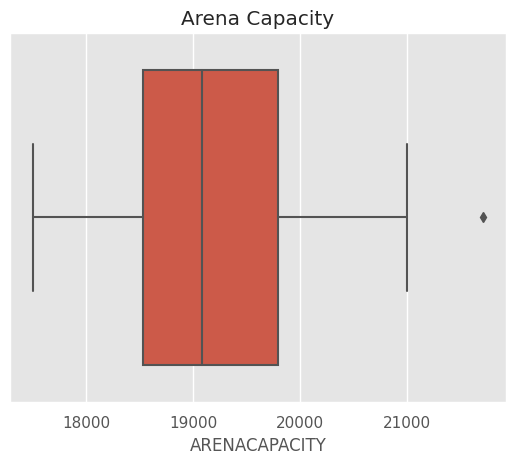

In [33]:
sns.boxplot(x=teams_csv['ARENACAPACITY'])
plt.title('Arena Capacity')

In [35]:
quantile_25 = teams_csv['ARENACAPACITY'].quantile(0.25)
mean_capacity = teams_csv['ARENACAPACITY'].mean()
quantile_75 = teams_csv['ARENACAPACITY'].quantile(0.75)

def categorize_capacity(capacity):
    if capacity <= quantile_25:
        return 'small'
    elif quantile_25 < capacity <= mean_capacity:
        return 'medium'
    elif mean_capacity < capacity <= quantile_75:
        return 'large'
    else:
        return 'extra large'

teams_csv['Capacity_Category'] = teams_csv['ARENACAPACITY'].apply(categorize_capacity)


In [36]:
teams_csv

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION,Capacity_Category
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks,medium
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws,medium
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,17791.0,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate,small
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls,extra large
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends,medium
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate,medium
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers,small
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario,medium
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers,medium
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce,large


In [37]:
games_teams_csv = games_csv.merge(teams_csv, left_on='HOME_TEAM_ID', right_on='TEAM_ID')

In [38]:
games_teams_csv.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR',
       'MAX_YEAR', 'ABBREVIATION', 'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA',
       'ARENACAPACITY', 'OWNER', 'GENERALMANAGER', 'HEADCOACH',
       'DLEAGUEAFFILIATION', 'Capacity_Category'],
      dtype='object')

In [39]:
games_teams_csv.groupby('Capacity_Category')['TEAM_ID_home'].nunique()

Capacity_Category
extra large     8
large           4
medium         10
small           8
Name: TEAM_ID_home, dtype: int64

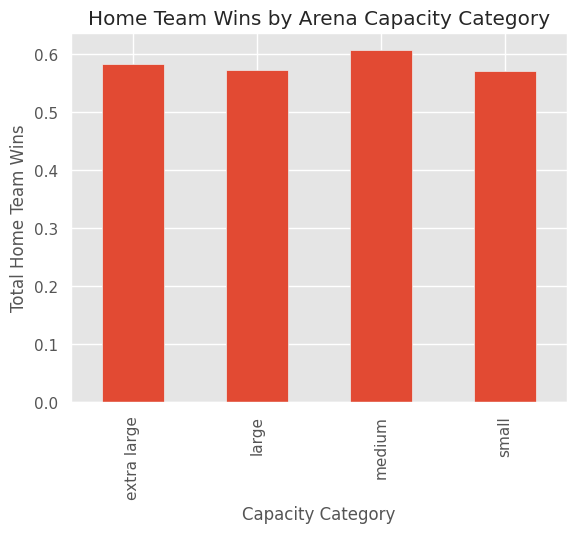

In [41]:
category_wins = games_teams_csv.groupby('Capacity_Category')['HOME_TEAM_WINS'].mean()

category_wins.plot(kind='bar')
plt.xlabel('Capacity Category')
plt.ylabel('Total Home Team Wins')
plt.title('Home Team Wins by Arena Capacity Category')
plt.show()

<ipython-input-42-18fa644589ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_games_details = games_details_csv.groupby('TEAM_ID').mean()


Text(0.5, 1.0, 'Average Number of Assists per Team by Average Field Goal Percentage per Team')

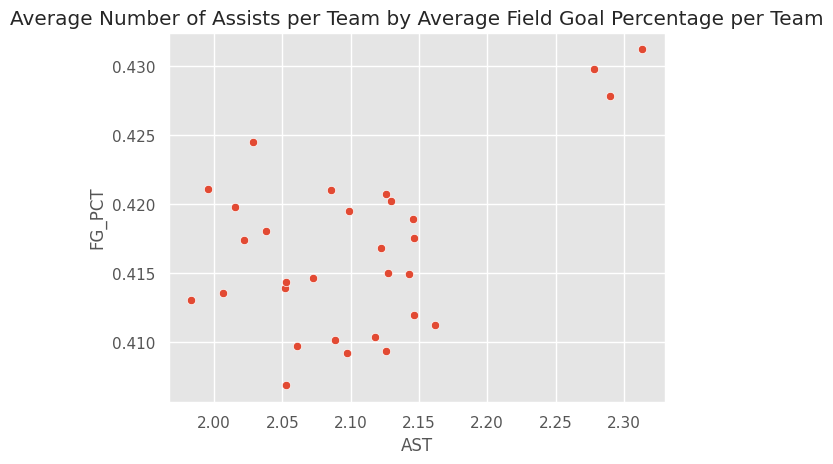

In [42]:
average_games_details = games_details_csv.groupby('TEAM_ID').mean()
sns.scatterplot(data=average_games_details, x='AST', y='FG_PCT')
plt.title('Average Number of Assists per Team by Average Field Goal Percentage per Team')

Text(0.5, 1.0, 'Average Number of Assists per Team by Average Free Throw Percentage')

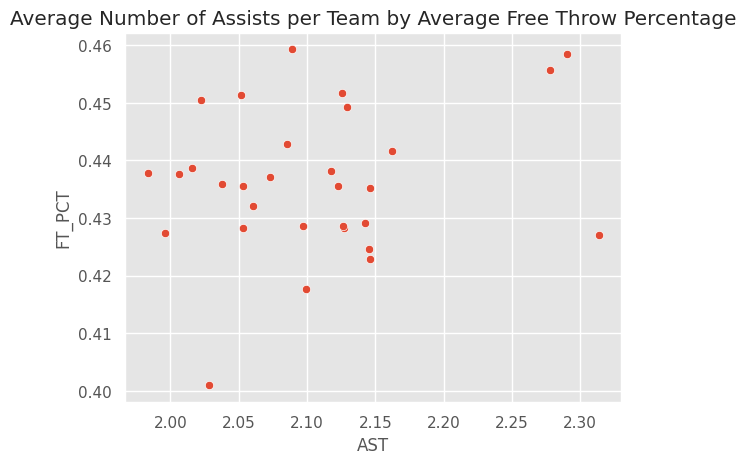

In [43]:
sns.scatterplot(data=average_games_details, x='AST', y='FT_PCT')
plt.title('Average Number of Assists per Team by Average Free Throw Percentage')

# **OPTION B: Bayesian Hierarchical Modeling**


# **1) Graphical Model And Data Manipulation**

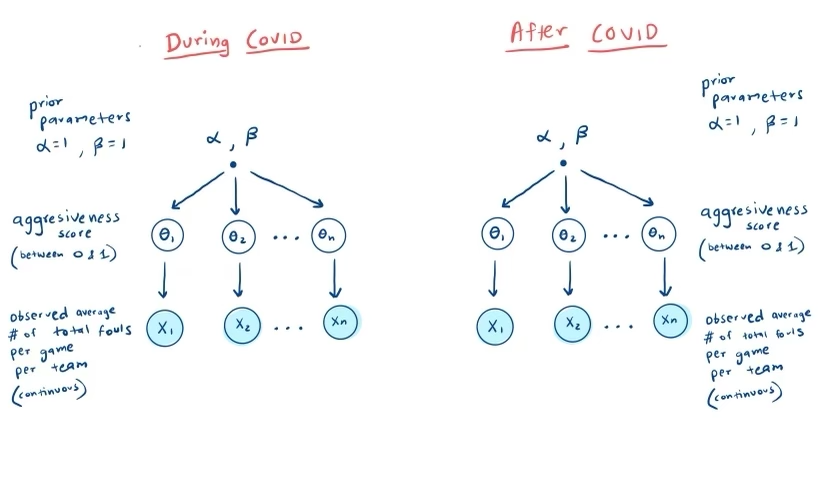

Looking at our dataframes, manipulating them to ensure they follow the structure neccessary for our Bayesian Hierarchichal Model.

In [44]:
df_insight = new_covid_df[new_covid_df['GAME_ID'] == 41900406]
df_insight

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
85576,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,3.0,11.0,14.0,10.0,1.0,0.0,1.0,3.0,28.0,18.0
85577,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,2.0,3.0,5.0,1.0,0.0,1.0,0.0,2.0,11.0,5.0
85578,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,4.0,11.0,15.0,3.0,1.0,2.0,3.0,4.0,19.0,18.0
85579,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,1.0,2.0,3.0,5.0,1.0,1.0,1.0,2.0,4.0,20.0
85580,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,17.0,8.0
85581,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,0.0,4.0,4.0,4.0,1.0,0.0,4.0,1.0,19.0,5.0
85582,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0
85583,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0
85584,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0
85585,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0


In [45]:
df_insight['TEAM_ID']

85576    1610612747
85577    1610612747
85578    1610612747
85579    1610612747
85580    1610612747
85581    1610612747
85582    1610612747
85583    1610612747
85584    1610612747
85585    1610612747
85586    1610612747
85587    1610612747
85588    1610612747
85589    1610612748
85590    1610612748
85591    1610612748
85592    1610612748
85593    1610612748
85594    1610612748
85595    1610612748
85596    1610612748
85597    1610612748
85598    1610612748
85599    1610612748
85600    1610612748
85601    1610612748
Name: TEAM_ID, dtype: int64

Currently our dataframes have a row for each player, for each game that they play. In order to transform these dataframes into a team level granularity, we want to first make sure there are two rows per game for each respective team. We will group by summing up the player statistics so that we will now have team level statistics for our rows.

In [46]:
game_team_merge = new_covid_df.groupby(['GAME_ID', 'TEAM_ID'])['PF', 'STL', 'OREB'].sum().reset_index()
game_team_merge

<ipython-input-46-f23cc75092c9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  game_team_merge = new_covid_df.groupby(['GAME_ID', 'TEAM_ID'])['PF', 'STL', 'OREB'].sum().reset_index()


,GAME_ID,TEAM_ID,PF,STL,OREB
0,41900101,1610612749,19.0,6.0,11.0
1,41900102,1610612749,26.0,5.0,11.0
2,41900103,1610612749,20.0,12.0,3.0
3,41900104,1610612749,19.0,7.0,8.0
4,41900105,1610612749,19.0,5.0,7.0
...,...,...,...,...,...
122,41900404,1610612748,21.0,8.0,7.0
123,41900405,1610612747,21.0,10.0,12.0
124,41900405,1610612748,19.0,7.0,9.0
125,41900406,1610612747,22.0,5.0,12.0


Now because each team plays a different number of games in our time frames, due to the nature of playoffs, we will average the number of fouls by the number of games played for each team. This will turn our dataframe into having 11 rows, one for each team. The "PF" column is now the average number of personal fouls a team had during a game in the time frame.

In [47]:
bayesian_covid_team = game_team_merge.groupby('TEAM_ID')['PF', 'STL', 'OREB'].mean().reset_index()
bayesian_covid_team

<ipython-input-47-176c497340f7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bayesian_covid_team = game_team_merge.groupby('TEAM_ID')['PF', 'STL', 'OREB'].mean().reset_index()


,TEAM_ID,PF,STL,OREB
0,1610612738,22.294118,6.705882,8.764706
1,1610612742,22.500000,6.500000,7.666667
2,1610612743,22.421053,6.157895,9.263158
3,1610612746,22.923077,7.461538,9.461538
4,1610612747,22.666667,8.047619,10.571429
5,1610612748,19.857143,6.904762,7.761905
6,1610612749,21.700000,7.200000,9.400000
7,1610612751,21.250000,5.000000,9.250000
8,1610612755,22.250000,5.000000,12.250000
9,1610612757,25.000000,7.400000,9.800000


Do the same for Post covid

In [48]:
game_team_merge_post = new_post_covid_df.groupby(['GAME_ID', 'TEAM_ID'])['PF', 'STL', 'OREB'].sum().reset_index()
bayesian_post_covid_team = game_team_merge_post.groupby('TEAM_ID')['PF', 'STL', 'OREB'].mean().reset_index()

<ipython-input-48-8503b847a140>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  game_team_merge_post = new_post_covid_df.groupby(['GAME_ID', 'TEAM_ID'])['PF', 'STL', 'OREB'].sum().reset_index()
<ipython-input-48-8503b847a140>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bayesian_post_covid_team = game_team_merge_post.groupby('TEAM_ID')['PF', 'STL', 'OREB'].mean().reset_index()


In [49]:
bayesian_post_covid_team

,TEAM_ID,PF,STL,OREB
0,1610612738,21.000000,6.400000,12.600000
1,1610612742,20.285714,5.571429,10.285714
2,1610612743,20.400000,6.100000,11.700000
3,1610612746,19.473684,6.789474,8.789474
4,1610612747,20.500000,6.666667,10.500000
5,1610612748,20.500000,7.250000,9.000000
6,1610612749,17.956522,7.826087,12.826087
7,1610612751,21.166667,7.083333,8.250000
8,1610612755,23.000000,8.000000,9.000000
9,1610612757,23.166667,5.166667,9.333333


Analyze this data

In [50]:
joined_bayesian_df = pd.concat([bayesian_covid_team, bayesian_post_covid_team])
joined_bayesian_df

,TEAM_ID,PF,STL,OREB
0,1610612738,22.294118,6.705882,8.764706
1,1610612742,22.500000,6.500000,7.666667
2,1610612743,22.421053,6.157895,9.263158
3,1610612746,22.923077,7.461538,9.461538
4,1610612747,22.666667,8.047619,10.571429
5,1610612748,19.857143,6.904762,7.761905
6,1610612749,21.700000,7.200000,9.400000
7,1610612751,21.250000,5.000000,9.250000
8,1610612755,22.250000,5.000000,12.250000
9,1610612757,25.000000,7.400000,9.800000


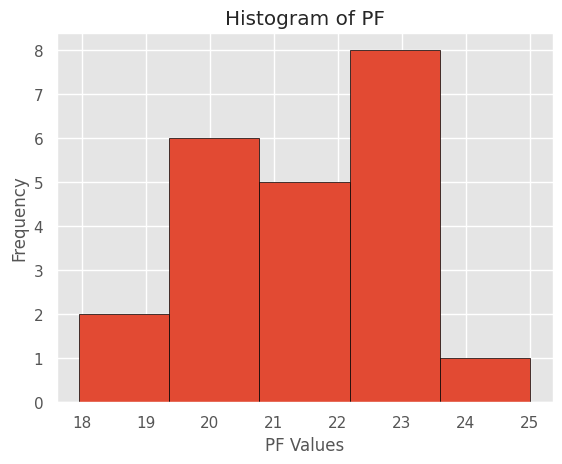

In [51]:
plt.hist(joined_bayesian_df['PF'], bins=5, edgecolor='black')
plt.title('Histogram of PF')
plt.xlabel('PF Values')
plt.ylabel('Frequency')
plt.show()

In [52]:
#NOTE: The count is 22 because of the joined dataset across 11 teams for covid and post-covid time frame
stats_pf = joined_bayesian_df['PF'].describe()
stats_pf

count    22.000000
mean     21.402580
std       1.607394
min      17.956522
25%      20.425000
50%      21.397727
75%      22.480263
max      25.000000
Name: PF, dtype: float64

# **2) Determine the Prior Distribution**
Now that we have our dataset sorted out for both time frames as well as a general graphical model to guide our model creation, we can now set our prior. Given that we do not have much insight into the aggressivness for a game of basketball, this will be considered a non-informative (weak) traditional prior as opposed to an empirical prior that is data driven.


In [55]:
def plot_beta(alpha_value, beta_value):
    x = np.arange(0, 1.01, 0.01)
    y = beta.pdf(x, alpha_value, beta_value)
    fig = plt.figure()
    plt.plot(x, y)
    plt.xlabel(r'$\theta_i$')
    plt.ylabel(r'$p(\theta_i)$')
    plt.title(r'Beta distribution with parameters $\alpha$ and $\beta$')
    plt.ylim(0, 1.1)  # Adjusted y-axis limit
    plt.show()

In [56]:
interactive_plot = interactive(plot_beta, alpha_value=(0, 20, 0.01), beta_value=(0,20, 0.01))
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='alpha_value', max=20.0, step=0.01), FloatSlider(val…

# **3) Figure out the Likelihood/Distribution for Observed Values**

Here are COVID statistics:

In [57]:
stats_covid = bayesian_covid_team['PF'].describe()
stats_covid

count    11.000000
mean     21.987460
std       1.584784
min      19.000000
25%      21.475000
50%      22.294118
75%      22.583333
max      25.000000
Name: PF, dtype: float64

In [58]:
print(f"This is the team with the max COVID PF: Team {bayesian_covid_team['PF'].idxmax()+1}")
print(f"This is the team with the min COVID PF: Team {bayesian_covid_team['PF'].idxmin()+1}")

This is the team with the max COVID PF: Team 10
This is the team with the min COVID PF: Team 11


Here are Post-COVID statistics:

In [61]:
stats_post_covid = bayesian_post_covid_team['PF'].describe()
stats_post_covid

count    11.000000
mean     20.817701
std       1.470265
min      17.956522
25%      20.342857
50%      20.500000
75%      21.356061
max      23.166667
Name: PF, dtype: float64

In [62]:
bayesian_post_covid_team['PF']

0     21.000000
1     20.285714
2     20.400000
3     19.473684
4     20.500000
5     20.500000
6     17.956522
7     21.166667
8     23.000000
9     23.166667
10    21.545455
Name: PF, dtype: float64

In [63]:
print(f"This is the team with the max COVID PF: Team {bayesian_post_covid_team['PF'].idxmax()+1}")
print(f"This is the team with the min COVID PF: Team {bayesian_post_covid_team['PF'].idxmin()+1}")

This is the team with the max COVID PF: Team 10
This is the team with the min COVID PF: Team 7


In [64]:
combined_stats_df = pd.DataFrame({'Joined': stats_pf,
                                  'COVID': stats_covid,
                                  'Post-COVID': stats_post_covid})
combined_stats_df

,Joined,COVID,Post-COVID
count,22.000000,11.000000,11.000000
mean,21.402580,21.987460,20.817701
std,1.607394,1.584784,1.470265
min,17.956522,19.000000,17.956522
25%,20.425000,21.475000,20.342857
50%,21.397727,22.294118,20.500000
75%,22.480263,22.583333,21.356061
max,25.000000,25.000000,23.166667


Visualizing the differences:

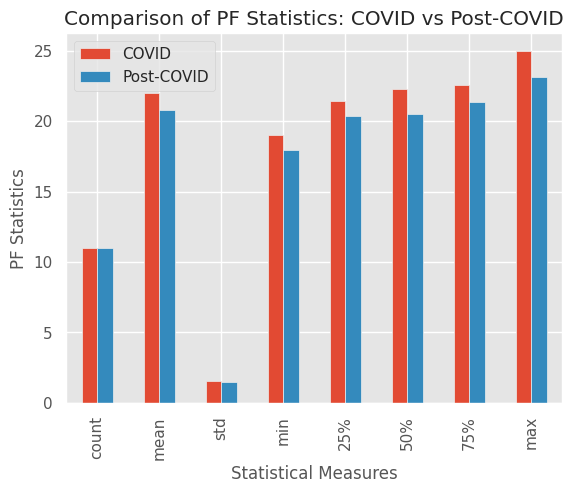

In [65]:
data = pd.DataFrame({'COVID': stats_covid, 'Post-COVID': stats_post_covid})
data.plot(kind='bar')
plt.title('Comparison of PF Statistics: COVID vs Post-COVID')
plt.ylabel('PF Statistics')
plt.xlabel('Statistical Measures')
plt.show()


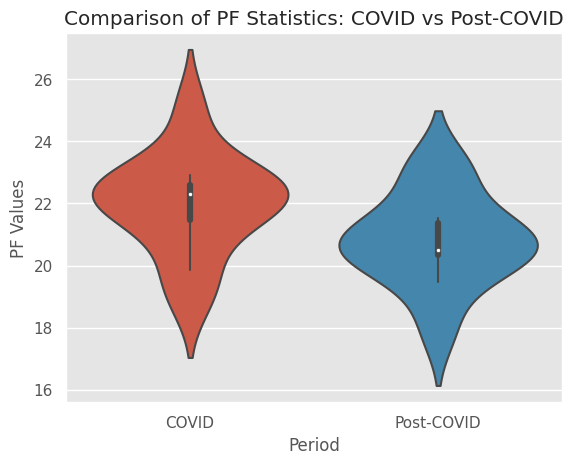

In [67]:
df_covid = pd.DataFrame({'PF': bayesian_covid_team['PF'], 'Period': 'COVID'})
df_post_covid = pd.DataFrame({'PF': bayesian_post_covid_team['PF'], 'Period': 'Post-COVID'})
combined_df = pd.concat([df_covid, df_post_covid])
sns.violinplot(x='Period', y='PF', data=combined_df)
plt.title('Comparison of PF Statistics: COVID vs Post-COVID')
plt.ylabel('PF Values')
plt.xlabel('Period')
plt.show()

Given that we are using averages, our data falls under continous data. Along with that, the possible ranges for personal fouls is between 0 and infinity. The agressiveness score should fall between 0 and 1. This eliminates the use of likelihoods/distributions like normal, binomial, and beta. Therefore based off of the support of the gamma distribution being continous and positive, we know that this is our best bet. As for the parameters of the distribution, they must be a function of theta but can be intepreted by solving for the observed mean and variances calculated from our two datasets respectively (see below).

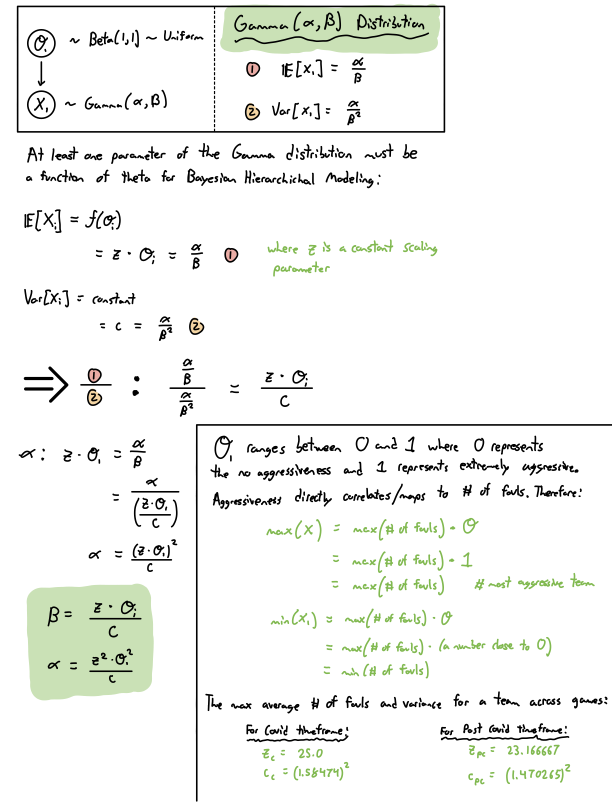

# **4) Creating Bayesian Hierarchical Model (based on Graphical Model where agressiveness maps to personal fouls)**

In [68]:
# Taken From Lab 3
def approximate_inference_MCMC(
    alpha_value, beta_value, alpha_scaler, beta_scaler, param_observed, df
):
    with pm.Model() as model:
        theta = pm.Beta('theta', alpha=alpha_value, beta=beta_value, shape=len(df))

        X = pm.Gamma('X', alpha = alpha_scaler * theta * theta, beta = beta_scaler * theta, observed = param_observed)

        trace = pm.sample(2000, chains=1, tune=1000, target_accept=0.95, return_inferencedata=True, progressbar=False)
    return (model, trace)


In [69]:
#Taken From Lab 3
def empirical_posterior_mean_estimates(alpha_value, beta_value, alpha_scaler, beta_scaler, param_observed, df):
    model, trace = approximate_inference_MCMC(alpha_value, beta_value, alpha_scaler, beta_scaler, param_observed, df)
    posterior_estimates = np.mean(trace["theta"], axis = 0)
    return posterior_estimates

## **COVID Timeframe Model**

In [70]:
alpha_prior_covid = 1
beta_prior_covid = 1

z_covid = np.max(joined_bayesian_df['PF'])
c_covid = np.var(joined_bayesian_df['PF'])

alpha_scaler_covid = ((z_covid)**2) / c_covid
beta_scaler_covid =  (z_covid) / c_covid

model_covid, trace_covid = approximate_inference_MCMC(alpha_prior_covid, beta_prior_covid, alpha_scaler_covid, beta_scaler_covid, bayesian_covid_team['PF'].values, bayesian_covid_team)
model_covid

In [71]:
trace_covid

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [72]:
thetas_covid = trace_covid.posterior['theta'].values
thetas_covid
print(thetas_covid.shape)
print(thetas_covid)

(1, 2000, 11)
[[[0.83111657 0.94864513 0.9857377  ... 0.92867572 0.90377304 0.8096885 ]
  [0.90995551 0.96512175 0.98294995 ... 0.89749375 0.96588791 0.86960189]
  [0.91886348 0.90623026 0.86529405 ... 0.90164612 0.90470163 0.62317936]
  ...
  [0.9162169  0.94150012 0.79650147 ... 0.93614804 0.89679883 0.79267878]
  [0.86163243 0.80735042 0.94661746 ... 0.83568149 0.98766207 0.78082029]
  [0.95092079 0.86376146 0.83240493 ... 0.9131131  0.78301749 0.83356812]]]


In [73]:
covid_posterior_df = pd.DataFrame(thetas_covid[0, :, :], columns=[f'theta_{j+1}' for j in range(thetas_covid.shape[2])])
covid_posterior_df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9,theta_10,theta_11
0,0.831117,0.948645,0.985738,0.921542,0.891274,0.778424,0.863573,0.800455,0.928676,0.903773,0.809689
1,0.909956,0.965122,0.982950,0.860573,0.940130,0.781514,0.815156,0.848112,0.897494,0.965888,0.869602
2,0.918863,0.906230,0.865294,0.918242,0.842440,0.790133,0.896085,0.895161,0.901646,0.904702,0.623179
3,0.932858,0.934867,0.866801,0.891029,0.830766,0.803037,0.916896,0.872443,0.872416,0.909296,0.573117
4,0.798326,0.871266,0.882444,0.896826,0.929294,0.816493,0.947358,0.834521,0.903823,0.970550,0.866551
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.844466,0.905171,0.856837,0.908311,0.942990,0.859707,0.895478,0.839076,0.853468,0.995017,0.811844
1996,0.866723,0.824332,0.872114,0.923774,0.935461,0.872140,0.803499,0.857368,0.764497,0.962120,0.784168
1997,0.916217,0.941500,0.796501,0.786124,0.831783,0.691423,0.890292,0.824503,0.936148,0.896799,0.792679
1998,0.861632,0.807350,0.946617,0.969672,0.939473,0.861993,0.846960,0.842794,0.835681,0.987662,0.780820


In [74]:
def plot_theta_kde(thetas, title, figsize=(12, 6), xlabel=r'$\theta$ value', ylabel='Density'):
    num_thetas = thetas.shape[2]
    plt.figure(figsize=figsize)

    for i in range(num_thetas):
        sns.kdeplot(thetas[0, :, i], label=f'theta_{i+1}')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

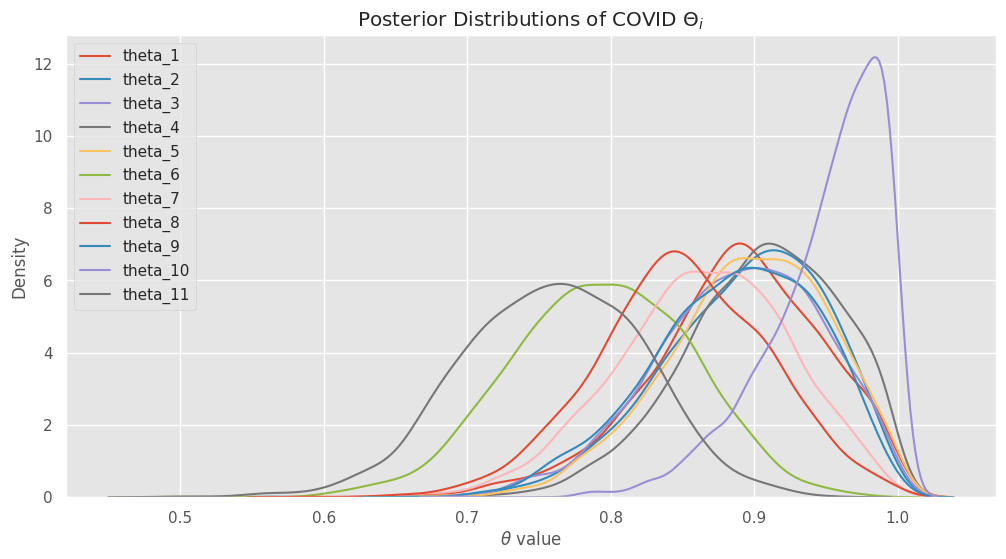

In [75]:
plot_theta_kde(thetas_covid, "Posterior Distributions of COVID $\Theta_i$")

In [76]:
#Taken From Lab 3
def plot_densities(df):
    num_teams = df.shape[1]
    fig, axs = plt.subplots(num_teams // 3 + int(num_teams % 3 > 0), 3, figsize=(15, 15))
    axs = axs.flatten()

    for i in range(num_teams):
        ax = axs[i]
        samples = df.iloc[:, i]
        ax.hist(samples, bins=30, density=True, alpha=0.7)
        ax.set_title(f'Theta {i+1} Distribution')
        ax.set_ylabel('Density')
    for i in range(num_teams, len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()

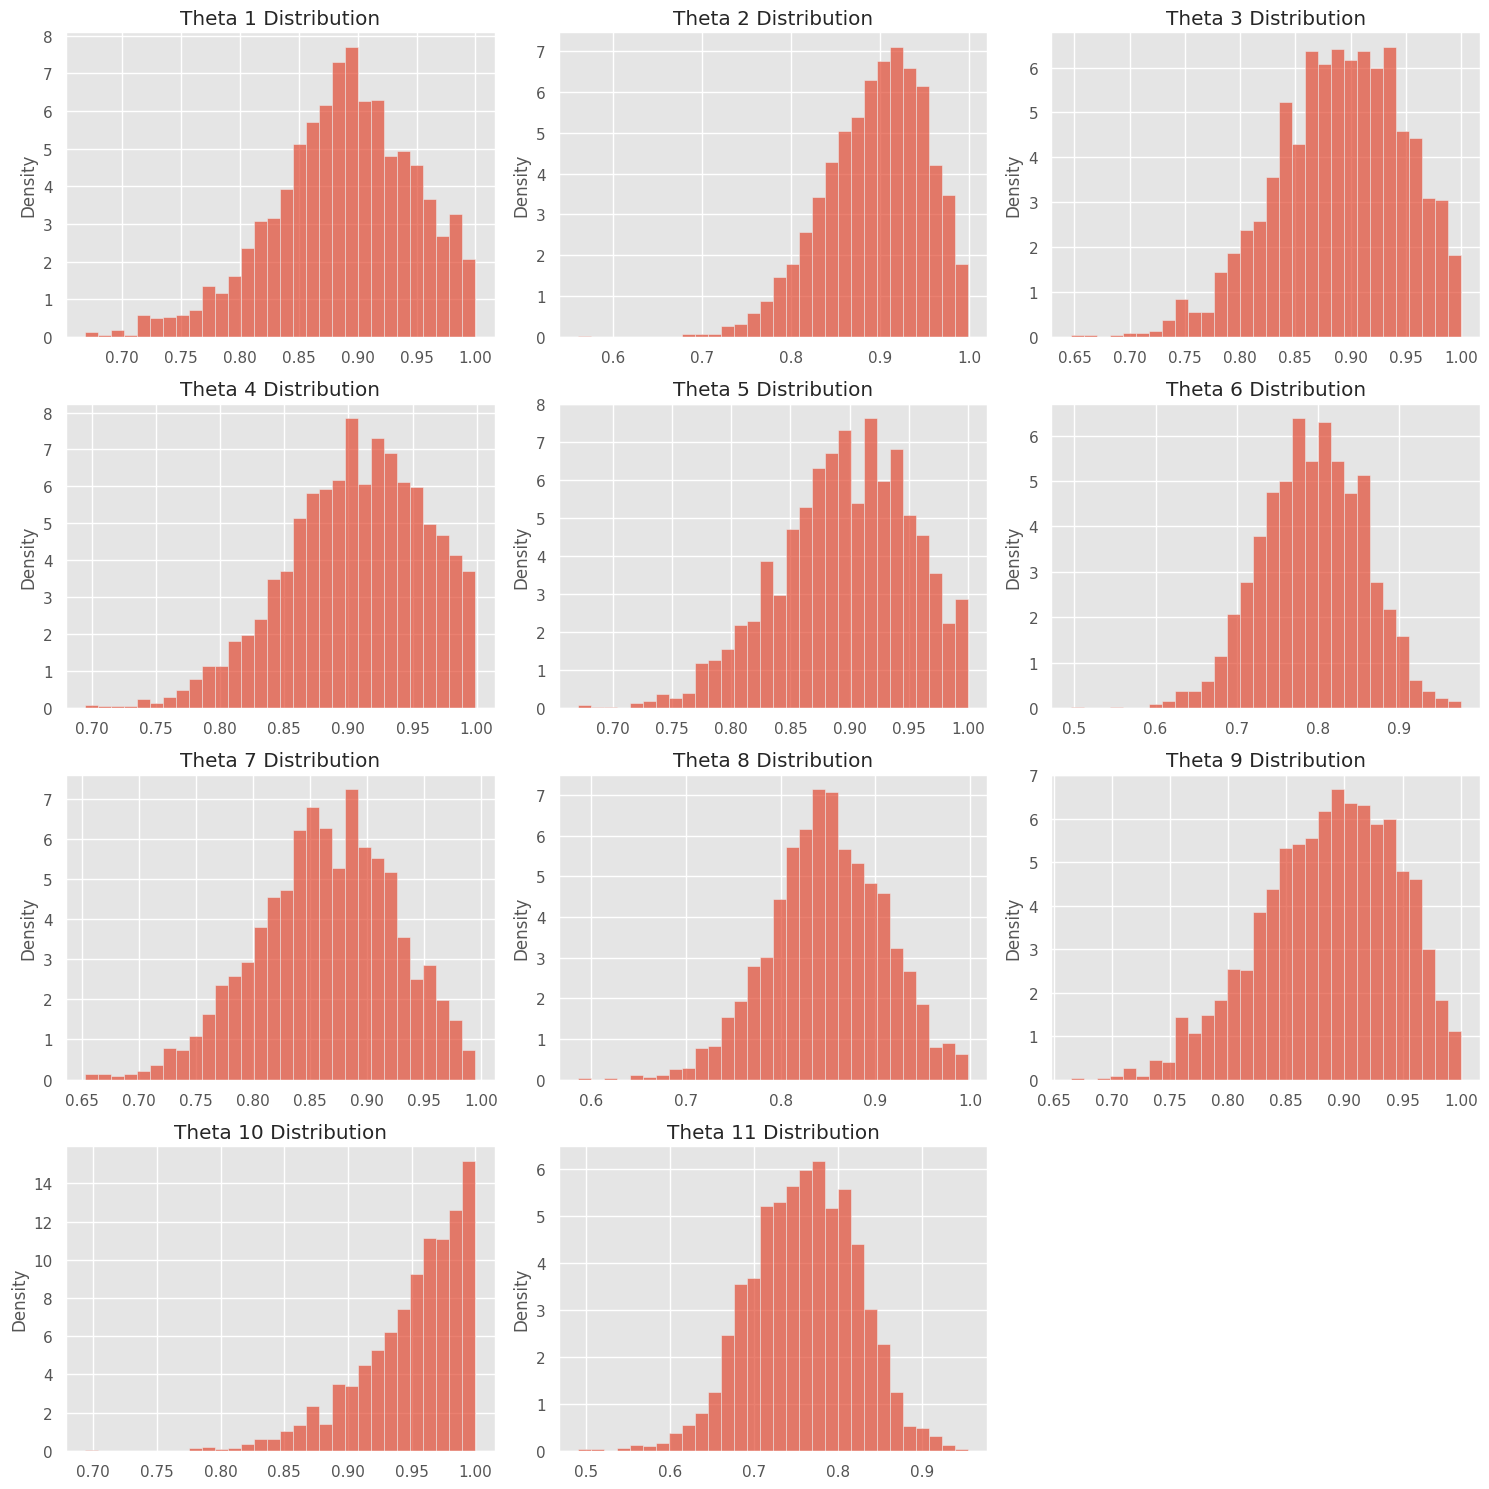

In [77]:
plot_densities(covid_posterior_df)

**COVID Posterior Credible Intervals**

In [78]:
def compute_credible_intervals(df, lower_quantile=0.025, upper_quantile=0.975):
    interval_data = []

    for column in df.columns:
        lower_bound = df[column].quantile(lower_quantile)
        upper_bound = df[column].quantile(upper_quantile)
        mean = df[column].mean()
        interval_data.append({'Theta': column, 'Mean': mean, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

    return pd.DataFrame(interval_data)

In [79]:
covid_credible_intervals = compute_credible_intervals(covid_posterior_df)
covid_credible_intervals

,Theta,Mean,Lower Bound,Upper Bound
0,theta_1,0.887085,0.752284,0.987871
1,theta_2,0.893828,0.772782,0.984136
2,theta_3,0.889229,0.761956,0.985475
3,theta_4,0.905319,0.788330,0.991427
4,theta_5,0.895651,0.777132,0.991059
5,theta_6,0.793118,0.666117,0.909712
6,theta_7,0.864058,0.738732,0.971927
7,theta_8,0.849254,0.728999,0.966193
8,theta_9,0.886251,0.762454,0.979642
9,theta_10,0.949876,0.849912,0.998411


## **Post-COVID Timeframe Model**

In [80]:
alpha_prior_post_covid = 1
beta_prior_post_covid = 1

z_post_covid = np.max(joined_bayesian_df['PF'])
c_post_covid = np.var(joined_bayesian_df['PF'])

alpha_scaler_post_covid = ((z_post_covid)**2) / c_post_covid
beta_scaler_post_covid =  (z_post_covid) / c_post_covid

model_post_covid, trace_post_covid = approximate_inference_MCMC(alpha_prior_post_covid, beta_prior_post_covid, alpha_scaler_post_covid, beta_scaler_post_covid, bayesian_post_covid_team['PF'].values, bayesian_post_covid_team)
model_post_covid

In [81]:
trace_post_covid

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [82]:
thetas_post_covid = trace_post_covid.posterior['theta'].values
thetas_post_covid
print(thetas_post_covid.shape)
print(thetas_post_covid)

(1, 2000, 11)
[[[0.87759951 0.7284178  0.85732894 ... 0.97057892 0.92528083 0.8185131 ]
  [0.91688586 0.67414051 0.81364975 ... 0.85440305 0.97709877 0.79677137]
  [0.72698078 0.87738714 0.90350465 ... 0.85150979 0.97341798 0.95728131]
  ...
  [0.87391955 0.62084935 0.89368459 ... 0.89063555 0.89254655 0.82238987]
  [0.76015074 0.9330984  0.91056412 ... 0.92034271 0.89643224 0.92188031]
  [0.8707405  0.65123674 0.86641868 ... 0.92376225 0.88910791 0.74980517]]]


In [83]:
post_covid_posterior_df = pd.DataFrame(thetas_post_covid[0, :, :], columns=[f'theta_{j+1}' for j in range(thetas_post_covid.shape[2])])
post_covid_posterior_df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9,theta_10,theta_11
0,0.877600,0.728418,0.857329,0.775444,0.907828,0.762635,0.751274,0.834813,0.970579,0.925281,0.818513
1,0.916886,0.674141,0.813650,0.824351,0.798450,0.786100,0.837160,0.829977,0.854403,0.977099,0.796771
2,0.726981,0.877387,0.903505,0.665753,0.772008,0.766224,0.576375,0.804293,0.851510,0.973418,0.957281
3,0.903927,0.725231,0.692428,0.874218,0.881983,0.918866,0.744346,0.804107,0.938095,0.949746,0.705763
4,0.853135,0.786435,0.777731,0.876464,0.888347,0.820223,0.723811,0.829466,0.853689,0.926780,0.833683
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.853820,0.719227,0.772262,0.649212,0.931367,0.896299,0.723589,0.774919,0.991330,0.925791,0.845915
1996,0.863651,0.886885,0.832369,0.910560,0.642902,0.795747,0.684474,0.867984,0.888967,0.900589,0.881252
1997,0.873920,0.620849,0.893685,0.902764,0.863676,0.846565,0.742339,0.817654,0.890636,0.892547,0.822390
1998,0.760151,0.933098,0.910564,0.803602,0.723449,0.850453,0.659434,0.819935,0.920343,0.896432,0.921880


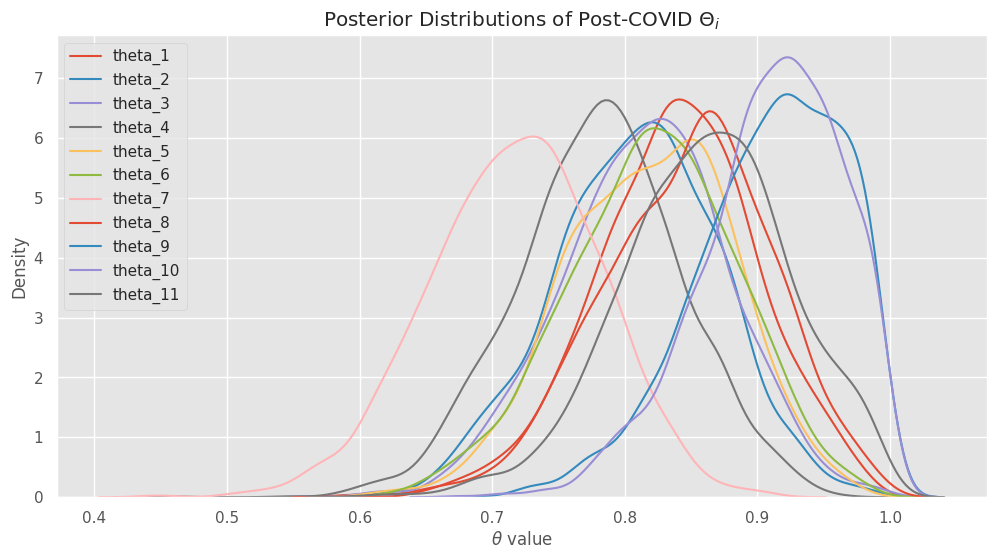

In [84]:
plot_theta_kde(thetas_post_covid, "Posterior Distributions of Post-COVID $\Theta_i$")

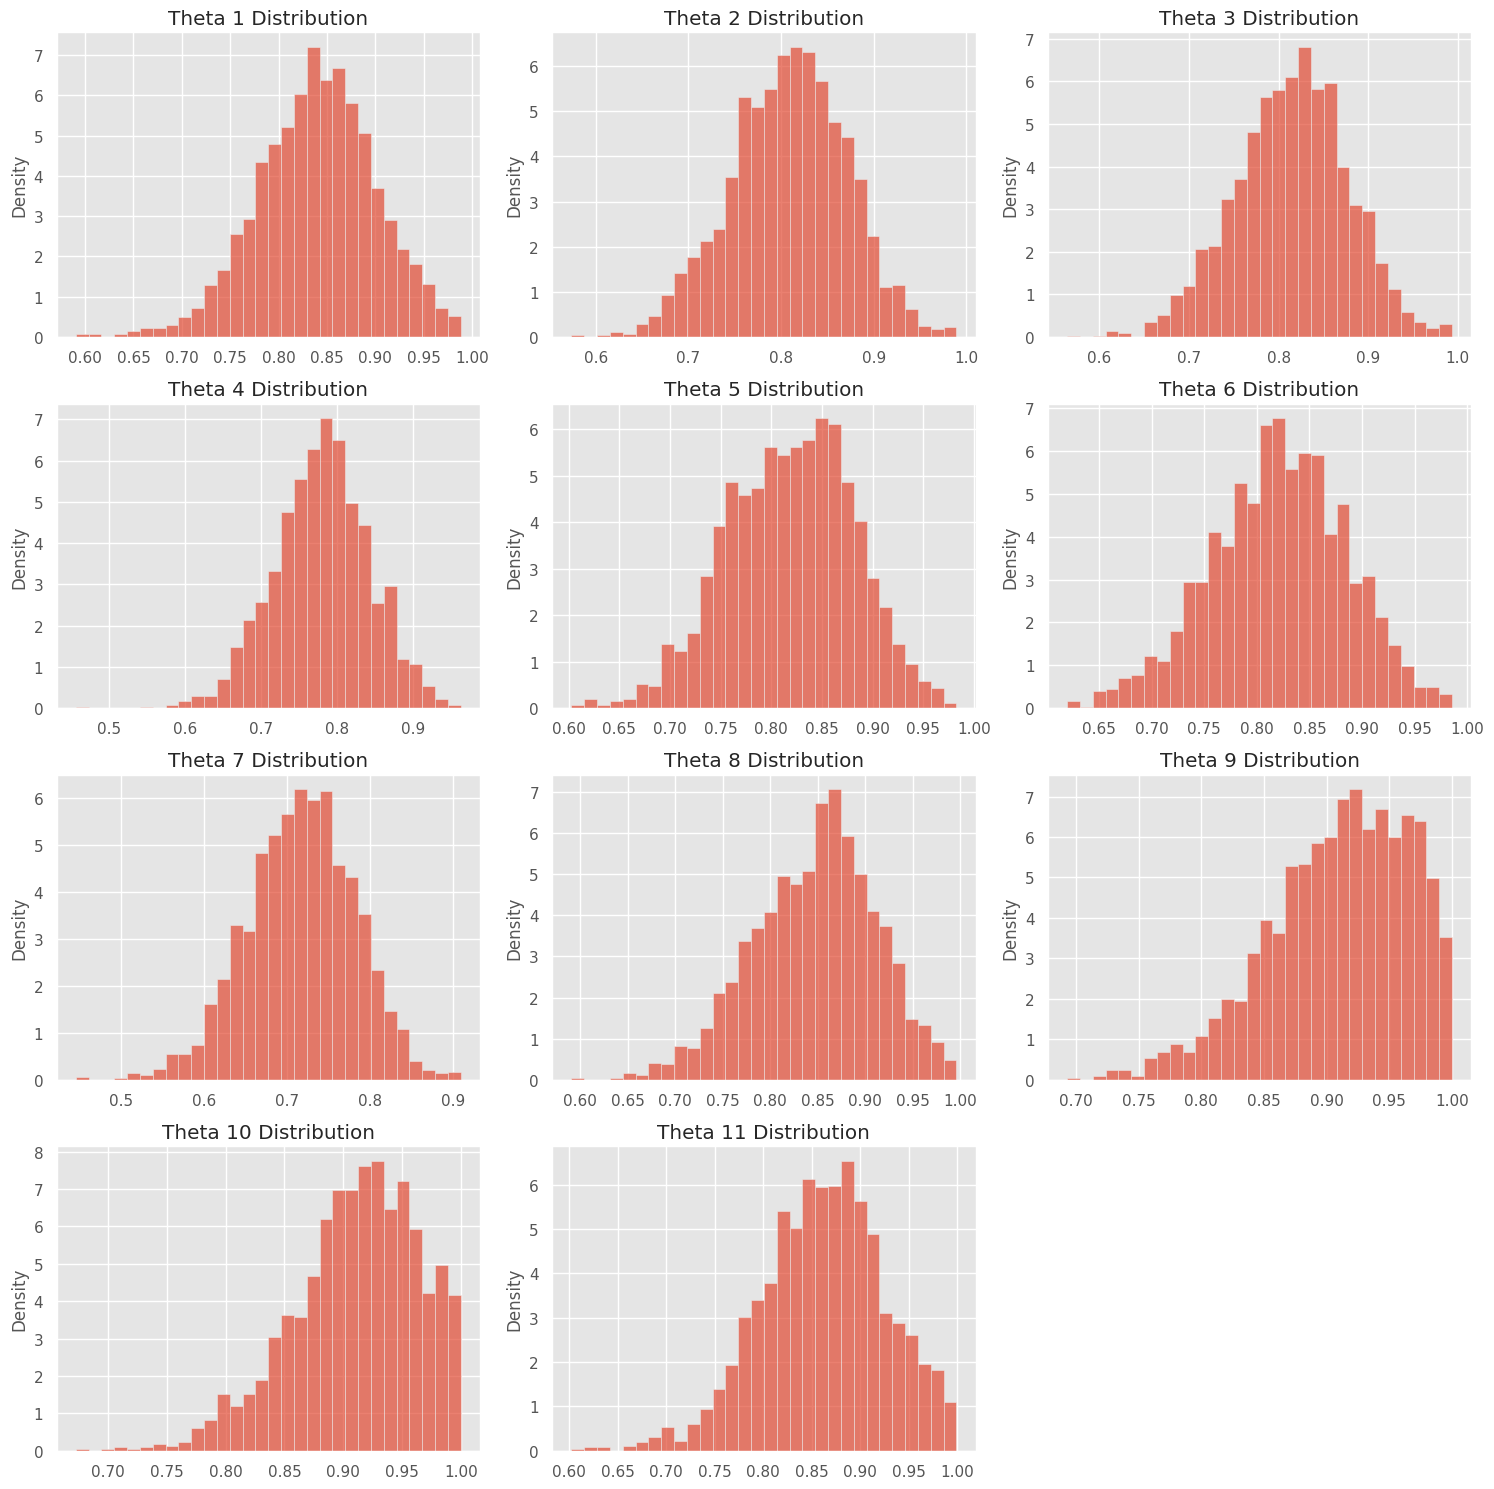

In [85]:
plot_densities(post_covid_posterior_df)

**Post-COVID Posterior Credible Intervals**



In [86]:
post_covid_credible_intervals = compute_credible_intervals(post_covid_posterior_df)
post_covid_credible_intervals

,Theta,Mean,Lower Bound,Upper Bound
0,theta_1,0.839378,0.715368,0.956047
1,theta_2,0.808513,0.683587,0.926217
2,theta_3,0.814729,0.688787,0.930922
3,theta_4,0.780116,0.655076,0.902769
4,theta_5,0.818546,0.695348,0.932858
5,theta_6,0.820279,0.684523,0.939576
6,theta_7,0.716421,0.584664,0.834647
7,theta_8,0.846792,0.711661,0.961698
8,theta_9,0.909637,0.782318,0.991527
9,theta_10,0.910625,0.792705,0.992294


## **Comparing COVID vs. Post-COVID Results**

In [87]:
def plot_densities_overlay(df_before, df_after):

    num_teams = df_before.shape[1]
    fig, axs = plt.subplots(num_teams // 3 + int(num_teams % 3 > 0), 3, figsize=(15, 15))
    axs = axs.flatten()

    for i in range(num_teams):
        ax = axs[i]
        samples_before = df_before.iloc[:, i]
        samples_after = df_after.iloc[:, i]

        ax.hist(samples_before, bins=30, density=True, alpha=0.7, label='During COVID')
        ax.hist(samples_after, bins=30, density=True, alpha=0.7, label='After COVID')

        ax.set_title(f'Theta {i+1} Distribution')
        ax.set_ylabel('Density')
        ax.legend()

    for i in range(num_teams, len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()

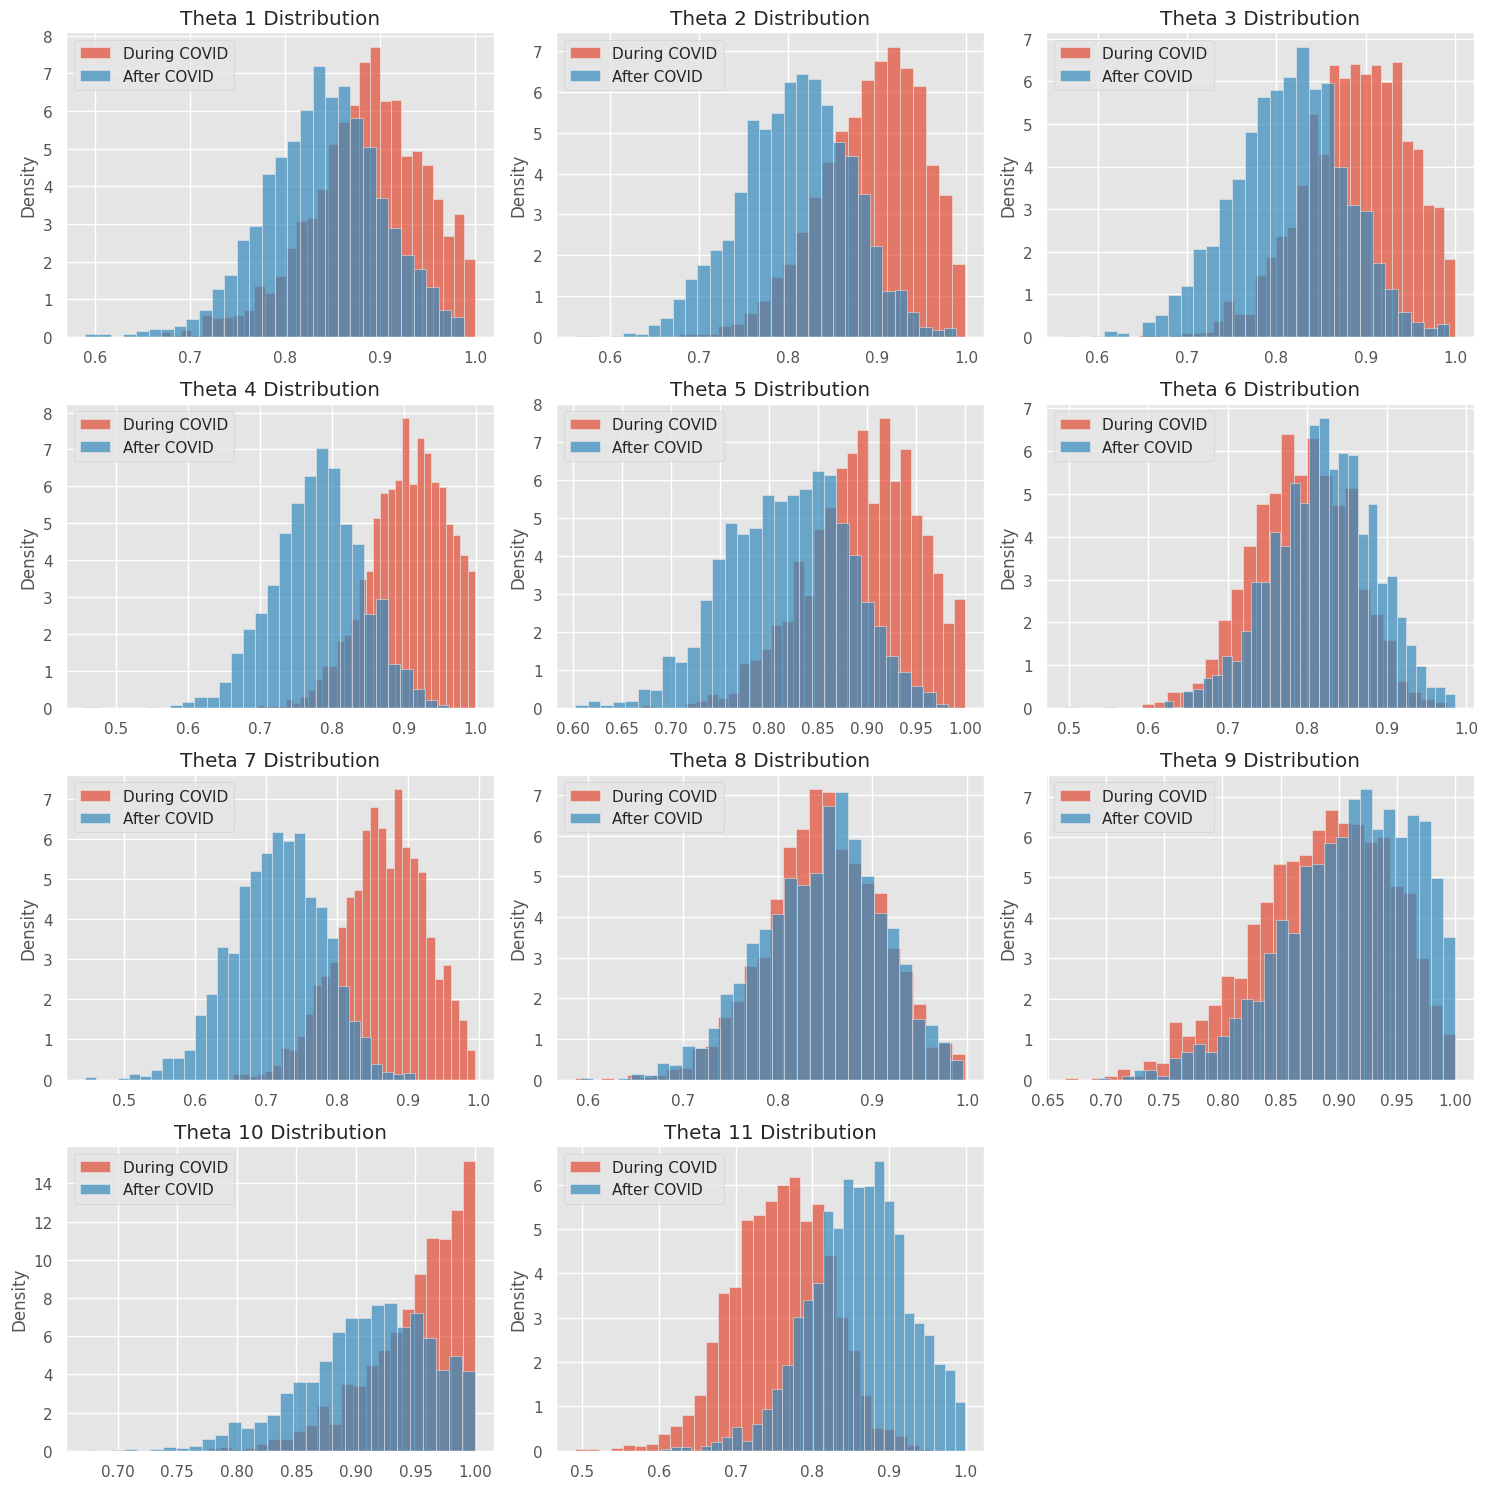

In [88]:
plot_densities_overlay(covid_posterior_df, post_covid_posterior_df)

In [90]:
def plot_credible_intervals(df1, df2, title, figsize=(12, 6)):
    df1 = df1.set_index('Theta')
    df2 = df2.set_index('Theta')

    intervals1 = [df1['Mean'] - df1['Lower Bound'], df1['Upper Bound'] - df1['Mean']]
    intervals2 = [df2['Mean'] - df2['Lower Bound'], df2['Upper Bound'] - df2['Mean']]

    plt.figure(figsize=figsize)
    x_indices = np.arange(len(df1))
    plt.errorbar(x=x_indices - 0.1, y=df1['Mean'], yerr=intervals1, fmt='o', label='COVID', capsize=5)
    plt.errorbar(x=x_indices + 0.1, y=df2['Mean'], yerr=intervals2, fmt='o', label='Post-COVID', capsize=5)

    plt.xticks(ticks=x_indices, labels=df1.index, rotation=45)
    plt.xlabel('Theta')
    plt.ylabel('Mean Values with 95% Credible Intervals')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

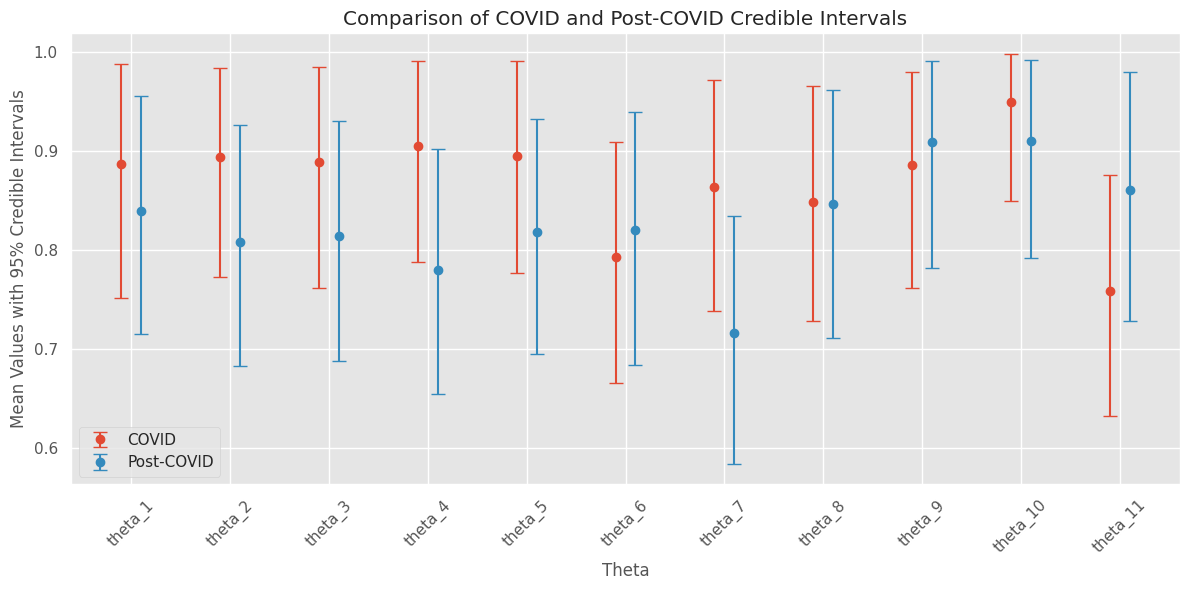

In [91]:
plot_credible_intervals(covid_credible_intervals, post_covid_credible_intervals, "Comparison of COVID and Post-COVID Credible Intervals")

# **5) Creating Bayesian Hierarchical Model (where agressiveness maps to personal fouls, steals, and offensive rebounds)**

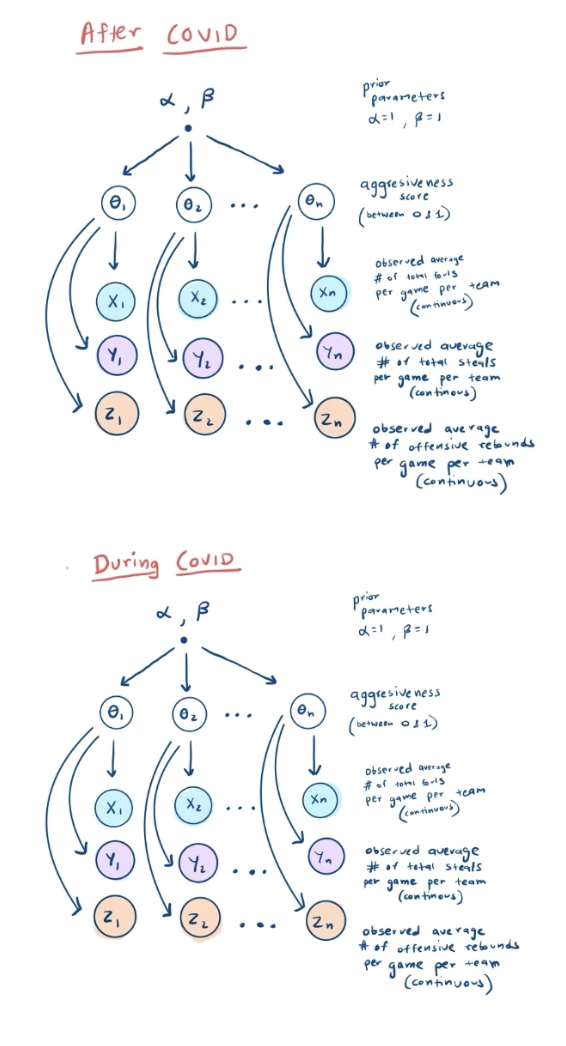

In [92]:
joined_bayesian_df

,TEAM_ID,PF,STL,OREB
0,1610612738,22.294118,6.705882,8.764706
1,1610612742,22.500000,6.500000,7.666667
2,1610612743,22.421053,6.157895,9.263158
3,1610612746,22.923077,7.461538,9.461538
4,1610612747,22.666667,8.047619,10.571429
5,1610612748,19.857143,6.904762,7.761905
6,1610612749,21.700000,7.200000,9.400000
7,1610612751,21.250000,5.000000,9.250000
8,1610612755,22.250000,5.000000,12.250000
9,1610612757,25.000000,7.400000,9.800000


In [93]:
joined_bayesian_df['STL'].describe()

count    22.000000
mean      6.570729
std       0.951963
min       5.000000
25%       6.110714
50%       6.686275
75%       7.237500
max       8.047619
Name: STL, dtype: float64

In [94]:
joined_bayesian_df['OREB'].describe()

count    22.000000
mean      9.778335
std       1.446486
min       7.666667
25%       9.000000
50%       9.348485
75%      10.446429
max      12.826087
Name: OREB, dtype: float64

In [95]:
# Taken From Lab 3
def approximate_inference_MCMC_2(
    alpha_value, beta_value,
    X_alpha_scaler, X_beta_scaler,
    Y_alpha_scaler, Y_beta_scaler,
    Z_alpha_scaler, Z_beta_scaler,
    X_param_observed, Y_param_observed, Z_param_observed,
    df
):
    with pm.Model() as model:
        theta = pm.Beta('theta', alpha=alpha_value, beta=beta_value, shape=len(df))

        X = pm.Gamma('X', alpha = X_alpha_scaler * theta * theta, beta = X_beta_scaler * theta, observed = X_param_observed)
        Y = pm.Gamma('Y', alpha = Y_alpha_scaler * theta * theta, beta = Y_beta_scaler * theta, observed = Y_param_observed)
        Z = pm.Gamma('Z', alpha = Z_alpha_scaler * theta * theta, beta = Z_beta_scaler * theta, observed = Z_param_observed)

        trace = pm.sample(2000, chains=1, tune=1000, target_accept=0.95, return_inferencedata=True)
    return (model, trace)


In [96]:
#Taken form Lab 3
def empirical_posterior_mean_estimates_2(
    alpha_value, beta_value,
    X_alpha_scaler, X_beta_scaler,
    Y_alpha_scaler, Y_beta_scaler,
    Z_alpha_scaler, Z_beta_scaler,
    X_param_observed, Y_param_observed, Z_param_observed,
    df):
    model, trace = approximate_inference_MCMC(alpha_value, beta_value,
    X_alpha_scaler, X_beta_scaler,
    Y_alpha_scaler, Y_beta_scaler,
    Z_alpha_scaler, Z_beta_scaler,
    X_param_observed, Y_param_observed, Z_param_observed,
    df)
    posterior_estimates = np.mean(trace["theta"], axis = 0)
    return posterior_estimates

## **COVID Timeframe Nuanced Model**

In [97]:
alpha_prior_covid = 1
beta_prior_covid = 1

X_alpha_scaler_covid = ((np.max(joined_bayesian_df['PF']))**2) / np.var(joined_bayesian_df['PF'])
X_beta_scaler_covid =  (np.max(joined_bayesian_df['PF'])) / np.var(joined_bayesian_df['PF'])

Y_alpha_scaler_covid = ((np.max(joined_bayesian_df['STL']))**2) / np.var(joined_bayesian_df['STL'])
Y_beta_scaler_covid =  (np.max(joined_bayesian_df['STL'])) / np.var(joined_bayesian_df['STL'])

Z_alpha_scaler_covid = (np.max(joined_bayesian_df['OREB'])**2) / np.var(joined_bayesian_df['OREB'])
Z_beta_scaler_covid =  (np.max(joined_bayesian_df['OREB'])) / np.var(joined_bayesian_df['OREB'])

nuanced_model_covid, nuanced_trace_covid = approximate_inference_MCMC_2(alpha_prior_covid, beta_prior_covid,
                                                      X_alpha_scaler_covid, X_beta_scaler_covid,
                                                      Y_alpha_scaler_covid, Y_beta_scaler_covid,
                                                      Z_alpha_scaler_covid, Z_beta_scaler_covid,
                                                      bayesian_covid_team['PF'].values, bayesian_covid_team['STL'].values, bayesian_covid_team['OREB'].values,
                                                      bayesian_covid_team)
nuanced_model_covid

In [98]:
nuanced_thetas_covid = nuanced_trace_covid.posterior['theta'].values
nuanced_thetas_covid
print(nuanced_thetas_covid.shape)
print(nuanced_thetas_covid)

(1, 2000, 11)
[[[0.76694899 0.77542352 0.82725724 ... 0.92807493 0.97080204 0.75938603]
  [0.91352727 0.82257277 0.83691917 ... 0.88363332 0.97610868 0.73318577]
  [0.92555277 0.8496869  0.79948747 ... 0.87662774 0.97526805 0.75475663]
  ...
  [0.81684519 0.76119085 0.80747014 ... 0.78748186 0.9878709  0.76422252]
  [0.8491365  0.84671401 0.84523225 ... 0.89687581 0.99904404 0.78176558]
  [0.7987172  0.77239709 0.86268804 ... 0.76541263 0.9920629  0.74172587]]]


In [99]:
nuanced_covid_posterior_df = pd.DataFrame(nuanced_thetas_covid[0, :, :], columns=[f'theta_{j+1}' for j in range(nuanced_thetas_covid.shape[2])])
nuanced_covid_posterior_df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9,theta_10,theta_11
0,0.766949,0.775424,0.827257,0.906219,0.813038,0.701178,0.805272,0.757557,0.928075,0.970802,0.759386
1,0.913527,0.822573,0.836919,0.871718,0.810969,0.835973,0.865345,0.774551,0.883633,0.976109,0.733186
2,0.925553,0.849687,0.799487,0.851488,0.912592,0.830242,0.827699,0.821054,0.876628,0.975268,0.754757
3,0.919633,0.823956,0.744208,0.875190,0.930998,0.822131,0.829921,0.859048,0.794366,0.890349,0.827126
4,0.859197,0.847270,0.890137,0.941168,0.991902,0.837072,0.838944,0.698109,0.926114,0.937933,0.633964
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.851778,0.824160,0.840946,0.873519,0.958104,0.861786,0.833272,0.832672,0.790741,0.950618,0.664920
1996,0.800774,0.882216,0.821491,0.860716,0.817979,0.777143,0.870699,0.713405,0.883212,0.901354,0.825317
1997,0.816845,0.761191,0.807470,0.873522,0.968580,0.665873,0.790587,0.830650,0.787482,0.987871,0.764223
1998,0.849136,0.846714,0.845232,0.879904,0.938839,0.842171,0.903429,0.728482,0.896876,0.999044,0.781766


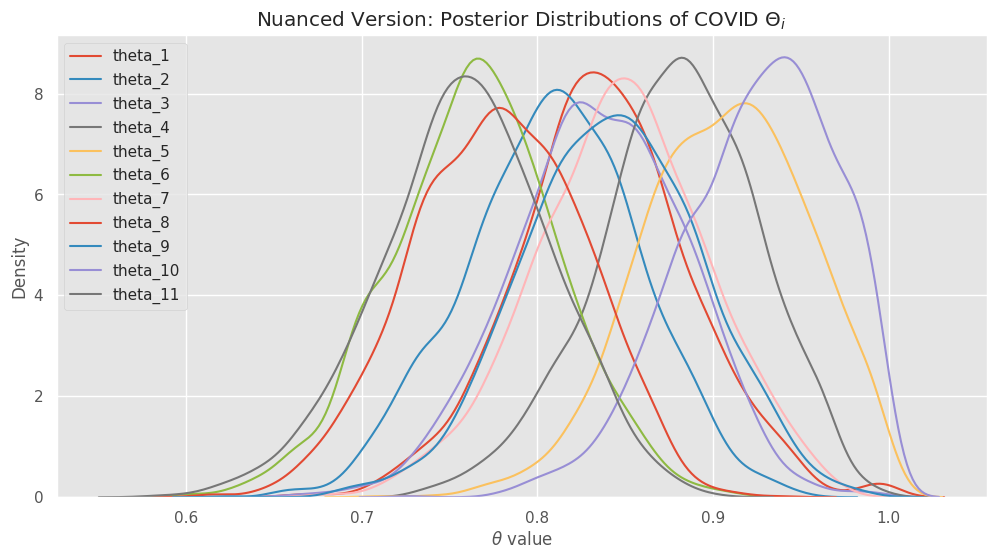

In [100]:
plot_theta_kde(nuanced_thetas_covid, "Nuanced Version: Posterior Distributions of COVID $\Theta_i$")

**Nuanced: COVID Posterior Credible Intervals**

In [101]:
nuanced_covid_credible_intervals = compute_credible_intervals(nuanced_covid_posterior_df)
nuanced_covid_credible_intervals

,Theta,Mean,Lower Bound,Upper Bound
0,theta_1,0.837798,0.738559,0.938236
1,theta_2,0.808150,0.710775,0.899567
2,theta_3,0.835270,0.738987,0.925058
3,theta_4,0.879289,0.781991,0.962501
4,theta_5,0.906585,0.811945,0.989249
5,theta_6,0.764059,0.665383,0.857292
6,theta_7,0.847222,0.744448,0.943142
7,theta_8,0.777488,0.681920,0.865198
8,theta_9,0.842431,0.742934,0.938049
9,theta_10,0.925481,0.832022,0.994099


## **Post-COVID Timeframe Nuanced Model**

In [102]:
alpha_prior_post_covid = 1
beta_prior_post_covid = 1

X_alpha_scaler_post_covid = ((np.max(joined_bayesian_df['PF']))**2) / np.var(joined_bayesian_df['PF'])
X_beta_scaler_post_covid =  (np.max(joined_bayesian_df['PF'])) / np.var(joined_bayesian_df['PF'])

Y_alpha_scaler_post_covid = ((np.max(joined_bayesian_df['STL']))**2) / np.var(joined_bayesian_df['STL'])
Y_beta_scaler_post_covid =  (np.max(joined_bayesian_df['STL'])) / np.var(joined_bayesian_df['STL'])

Z_alpha_scaler_post_covid = (np.max(joined_bayesian_df['OREB'])**2) / np.var(joined_bayesian_df['OREB'])
Z_beta_scaler_post_covid =  (np.max(joined_bayesian_df['OREB'])) / np.var(joined_bayesian_df['OREB'])

nuanced_model_post_covid, nuanced_trace_post_covid = approximate_inference_MCMC_2(alpha_prior_post_covid, beta_prior_post_covid,
                                                      X_alpha_scaler_post_covid, X_beta_scaler_post_covid,
                                                      Y_alpha_scaler_post_covid, Y_beta_scaler_post_covid,
                                                      Z_alpha_scaler_post_covid, Z_beta_scaler_post_covid,
                                                      bayesian_post_covid_team['PF'].values, bayesian_post_covid_team['STL'].values, bayesian_post_covid_team['OREB'].values,
                                                      bayesian_post_covid_team)
nuanced_model_post_covid

In [103]:
nuanced_thetas_post_covid = nuanced_trace_post_covid.posterior['theta'].values
nuanced_thetas_post_covid
print(nuanced_thetas_post_covid.shape)
print(nuanced_thetas_post_covid)

(1, 2000, 11)
[[[0.83679344 0.7628567  0.78774413 ... 0.88772115 0.83449604 0.81252215]
  [0.884016   0.74521806 0.79373968 ... 0.91454298 0.79092511 0.80578058]
  [0.88789076 0.65807433 0.76155274 ... 0.90703945 0.66307    0.81021886]
  ...
  [0.90116202 0.89613342 0.80943482 ... 0.94066023 0.97397147 0.83276662]
  [0.80925285 0.77547075 0.78056005 ... 0.81149805 0.99009781 0.81077558]
  [0.87364828 0.78968632 0.81959453 ... 0.89921027 0.98870024 0.72476872]]]


In [104]:
nuanced_post_covid_posterior_df = pd.DataFrame(nuanced_thetas_post_covid[0, :, :], columns=[f'theta_{j+1}' for j in range(nuanced_thetas_post_covid.shape[2])])
nuanced_post_covid_posterior_df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9,theta_10,theta_11
0,0.836793,0.762857,0.787744,0.753229,0.893237,0.758149,0.897430,0.822148,0.887721,0.834496,0.812522
1,0.884016,0.745218,0.793740,0.732061,0.927560,0.835880,0.846280,0.719887,0.914543,0.790925,0.805781
2,0.887891,0.658074,0.761553,0.754151,0.944351,0.855651,0.830588,0.768413,0.907039,0.663070,0.810219
3,0.870398,0.715191,0.734270,0.687255,0.930856,0.821882,0.826649,0.801975,0.905021,0.624659,0.874889
4,0.805512,0.906293,0.838220,0.698979,0.879568,0.815634,0.805382,0.833290,0.947600,0.864198,0.900731
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.849157,0.829162,0.830405,0.817005,0.796712,0.709969,0.803167,0.809525,0.853789,0.799000,0.762277
1996,0.800771,0.857903,0.824953,0.825776,0.800749,0.724003,0.795959,0.830208,0.828329,0.839307,0.733606
1997,0.901162,0.896133,0.809435,0.705034,0.838518,0.878626,0.805725,0.767494,0.940660,0.973971,0.832767
1998,0.809253,0.775471,0.780560,0.819779,0.878390,0.783580,0.797905,0.790720,0.811498,0.990098,0.810776


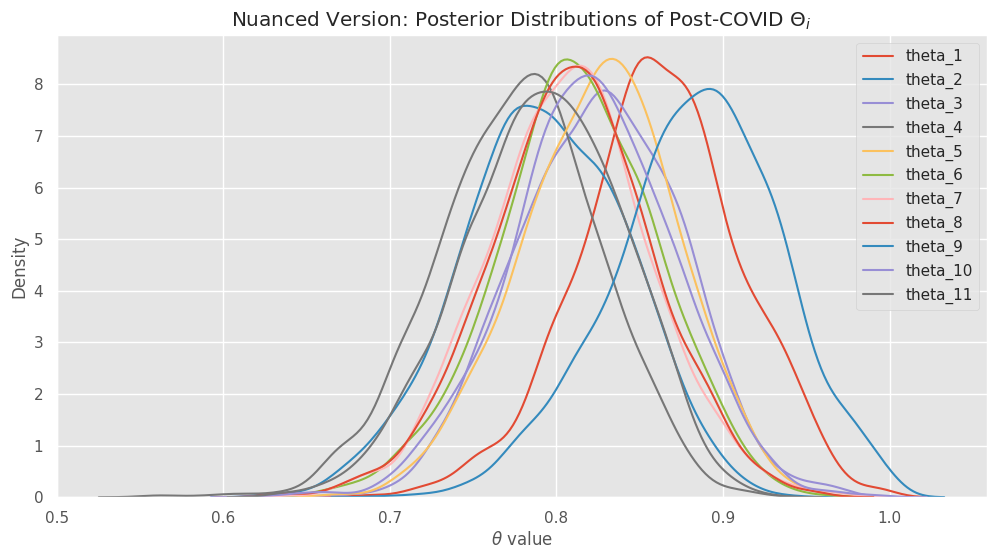

In [105]:
plot_theta_kde(nuanced_thetas_post_covid, "Nuanced Version: Posterior Distributions of Post-COVID $\Theta_i$")

**Nuanced: Post-COVID Posterior Credible Intervals**

In [106]:
nuanced_post_covid_credible_intervals = compute_credible_intervals(nuanced_post_covid_posterior_df)
nuanced_post_covid_credible_intervals

,Theta,Mean,Lower Bound,Upper Bound
0,theta_1,0.861421,0.759333,0.952064
1,theta_2,0.792283,0.691524,0.885172
2,theta_3,0.826052,0.731325,0.916203
3,theta_4,0.776250,0.675542,0.865616
4,theta_5,0.825450,0.731784,0.911883
5,theta_6,0.811948,0.710813,0.902675
6,theta_7,0.807541,0.716024,0.904055
7,theta_8,0.808652,0.711211,0.902145
8,theta_9,0.883523,0.779243,0.977812
9,theta_10,0.820953,0.722733,0.915330


## **Comparing Nuanced COVID vs. Post-COVID Results**

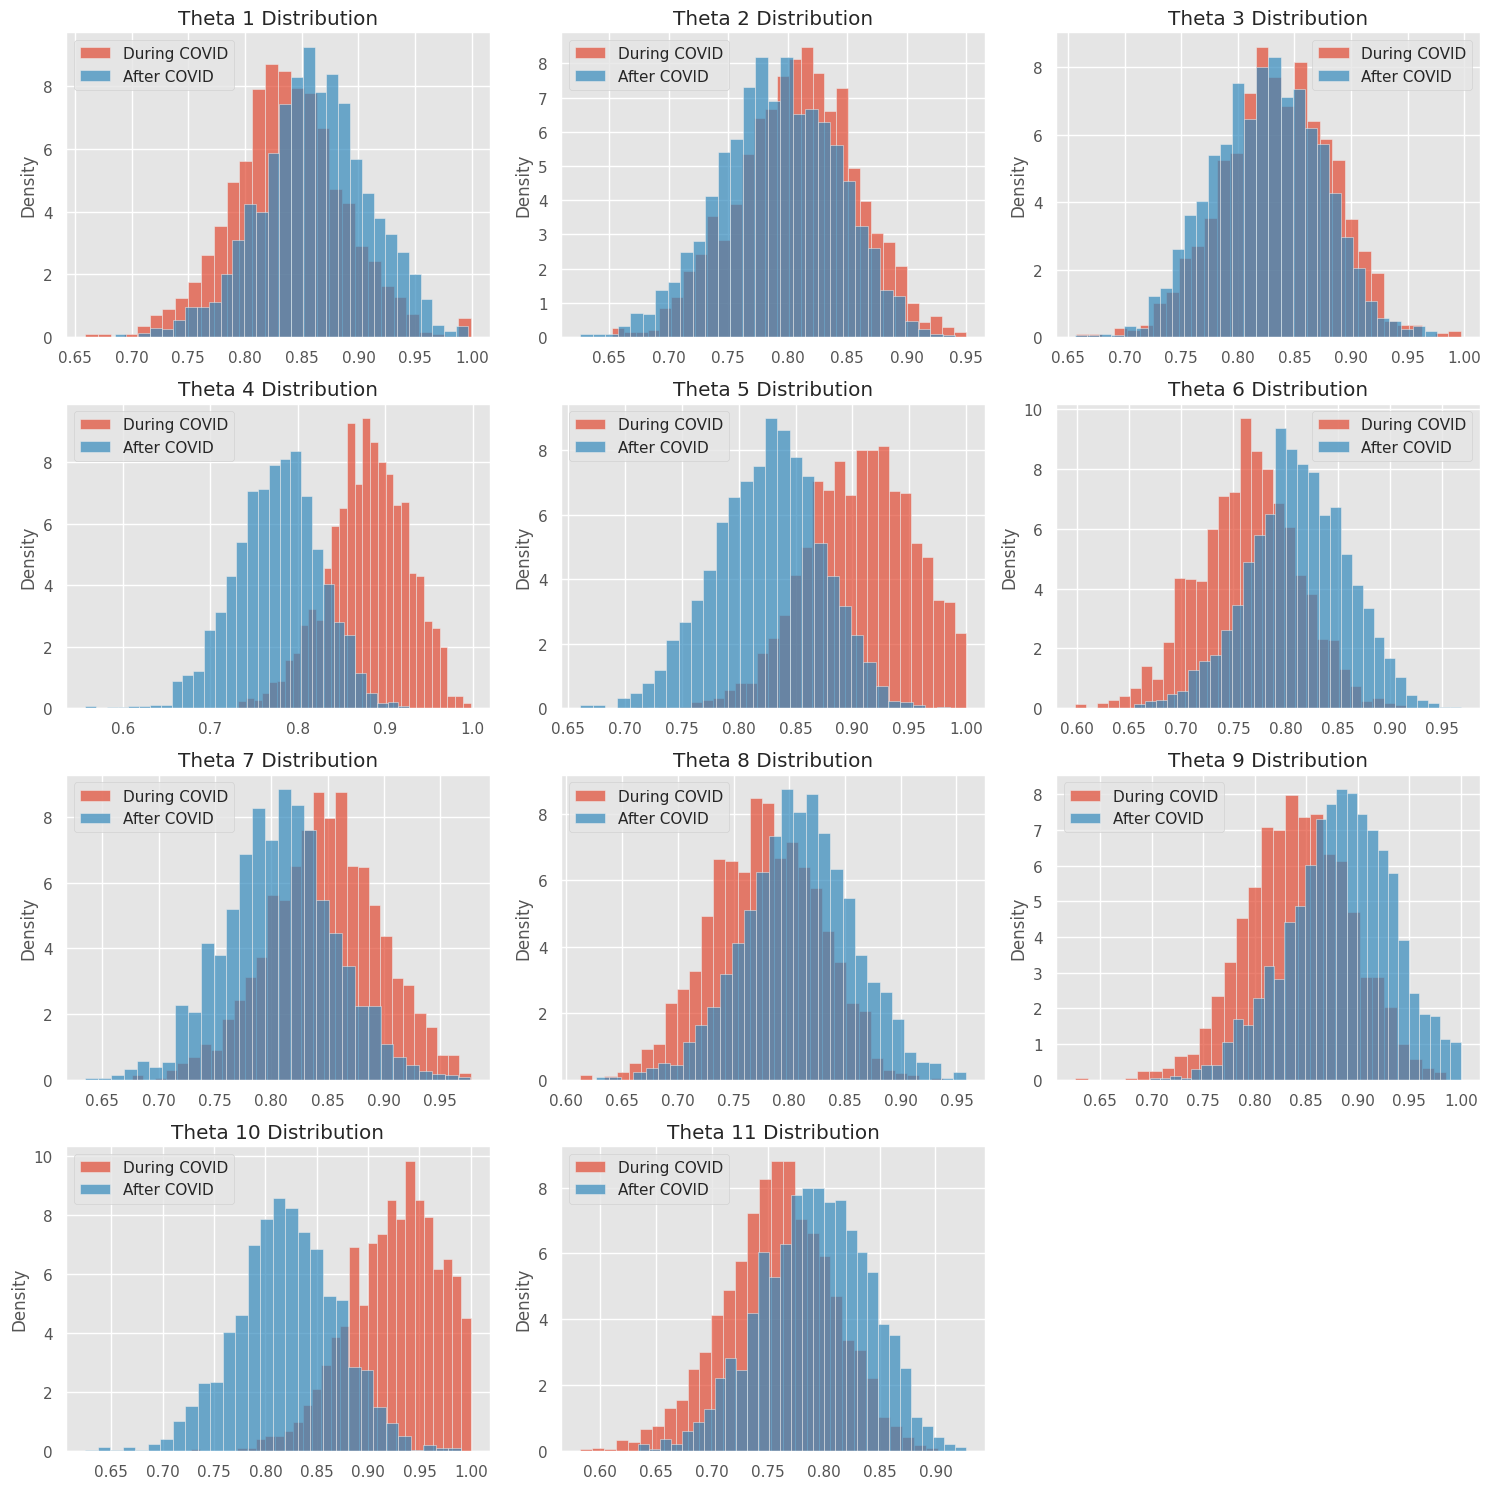

In [107]:
plot_densities_overlay(nuanced_covid_posterior_df, nuanced_post_covid_posterior_df)

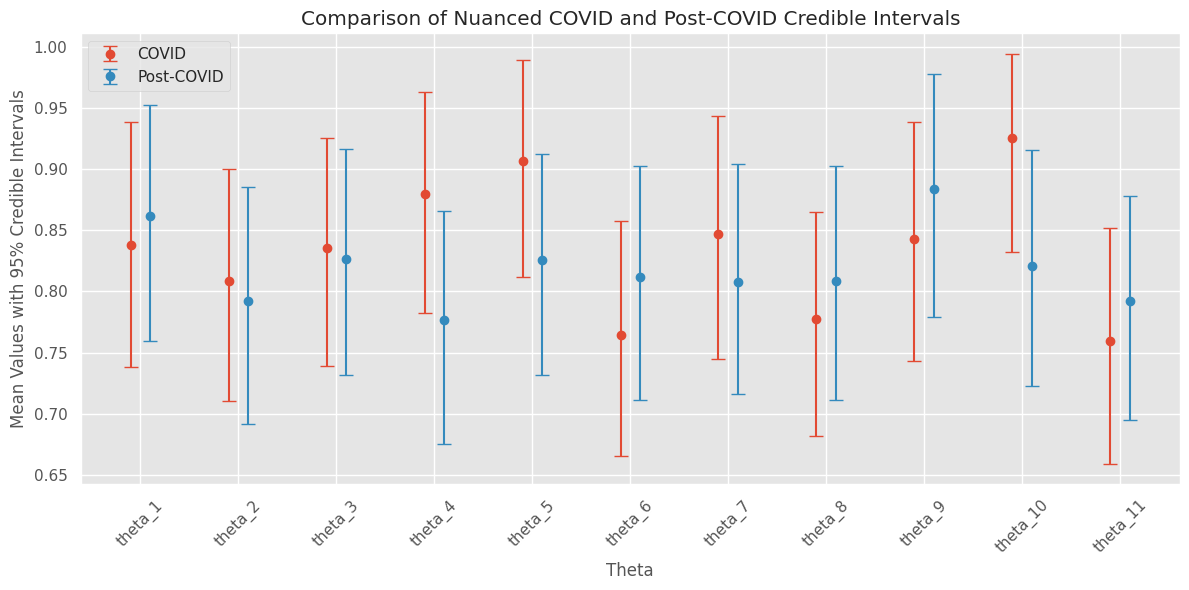

In [108]:
plot_credible_intervals(nuanced_covid_credible_intervals, nuanced_post_covid_credible_intervals, "Comparison of Nuanced COVID and Post-COVID Credible Intervals")